# ***NAME: DEBOLINA CHATTERJEE(23122112) & SIDDHARTHA SINHA(23122133)*** 
# ***TOPIC: STELLAR CLASSIFICATION ANALYSIS***
# ***CLASS: 3MSCDSB***
# ***------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***


# **CONTEXT:**

---


In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

In [105]:
# Importing different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [106]:
# Loading the dataset
df = pd.read_csv("star_classification.csv")

# **DESCRIPTION OF THE DATASET:**

---

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.


*   obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

*   alpha = Right Ascension angle (at J2000 epoch)

*   delta = Declination angle (at J2000 epoch)

*   u = Ultraviolet filter in the photometric system

*   g = Green filter in the photometric system
*   r = Red filter in the photometric system


*   z = Infrared filter in the photometric system


*   run_ID = Run Number used to identify the specific scan


*   rereun_ID = Rerun Number to specify how the image was processed


*   cam_col = Camera column to identify the scanline within the run

*   field_ID = Field number to identify each field

*   spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

*   class = object class (galaxy, star or quasar object)

*   redshift = redshift value based on the increase in wavelength
*   plate = plate ID, identifies each plate in SDSS


*   MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken


*   fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [107]:
# top 5 rows of the dataset
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237660e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237660e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237660e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237660e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543780e+18   
1  21.16812  21.61427    4518       301        5       119  1.176010e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030110e+19   
4  15.97711  15.54461    8102       301        3       137  6.891860e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [108]:
# bottom 5 rows of the dataset
df.tail()

obj_ID       alpha      delta         u         g         r  \
99995  1.237680e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237680e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237670e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237660e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237660e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.060000e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586350e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112010e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343150e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [109]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237688e+18     177.629117      24.135305      21.980468   
std    2.311624e+14      96.502241      19.644665      31.769291   
min    1.237650e+18       0.005528     -18.785328   -9999.000000   
25%    1.237660e+18     127.518222       5.146771      20.352353   
50%    1.237660e+18     180.900700      23.645922      22.179135   
75%    1.237670e+18     233.895005      39.901550      23.687440   
max    1.240000e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783893e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324026e+18   
min       109.000000     301.0       1.000000      11.000000  2.995190e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844140e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614885e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332142e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412690e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [110]:
# identifying the different stellar classifications from the dataset
unique_stellars = df['class'].unique()
unique_stellars

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [111]:








# identifying the counts of each of those stellar classifications
value_counts = df['class'].value_counts()
value_counts

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

# **DATA CLEANING:**

In [112]:
# Identify missing values:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [113]:
# Checking for duplicates:
duplicate_rows = df.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

# Count of duplicate rows:
duplicate_count = df.duplicated().sum()
print("Count of Duplicate Rows:", duplicate_count)

Duplicate Rows:
 0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
Count of Duplicate Rows: 0


### **INTERPRETATION:**

Performing data cleaning we can see that,

- We have **no missing values**.
- We have **no duplicate values**.

# **UNDERSTANDING DATA DISTRIBUTION USING VARIOUS STELLAR METRICS:**

## ***RIGHT ASCENSION ANGLE (AT J2000 EPOCH):***

### **GENERAL DESCRIPTIVE STATISTICS:**

In [114]:
df['alpha'].describe()

count    100000.000000
mean        177.629117
std          96.502241
min           0.005528
25%         127.518222
50%         180.900700
75%         233.895005
max         359.999810
Name: alpha, dtype: float64

Text(0.5, 1.0, 'HISTOGRAM OF RIGHT ASCENSION ANGLES')

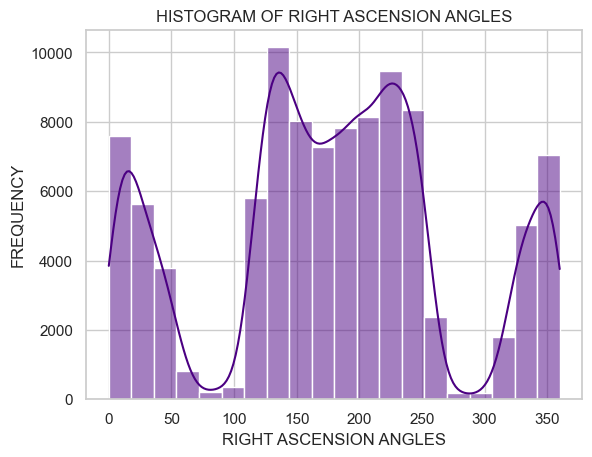

In [115]:
# Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['alpha'], bins=20, color='indigo', kde=True)

# Adding labels and titles for better visualization
plt.xlabel('RIGHT ASCENSION ANGLES')
plt.ylabel('FREQUENCY')
plt.title('HISTOGRAM OF RIGHT ASCENSION ANGLES')

In [116]:
# Finding out skewness
df['alpha'].skew()

-0.028510865448971422

<Axes: >

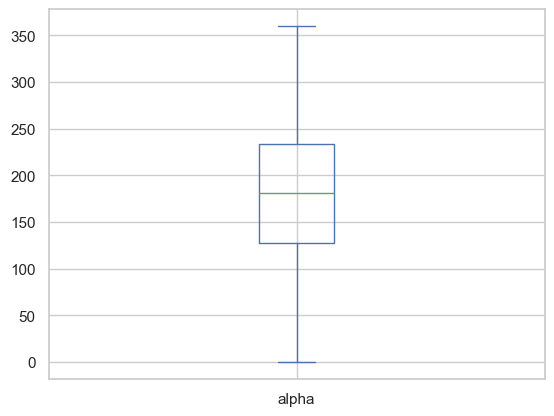

In [117]:
# Finding outliers
df['alpha'].plot(kind='box')

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\3767795242.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'VIOLIN PLOT FOR DIFFERENT CATEGORIES IN RIGHT ASCENSION FILTERS')

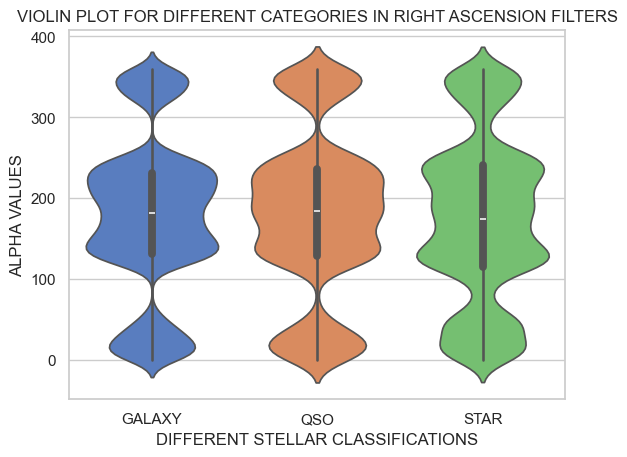

In [118]:
# Creating a violin plot
sns.violinplot(x=df['class'], y=df['alpha'], palette='muted')

# Adding labels and title for better visualization
plt.xlabel('DIFFERENT STELLAR CLASSIFICATIONS')
plt.ylabel('ALPHA VALUES')
plt.title('VIOLIN PLOT FOR DIFFERENT CATEGORIES IN RIGHT ASCENSION FILTERS')

In [119]:
# Finding out any missing value
df['alpha'].isnull().sum()

0

### **INTERPRETATION:**
Using general descriptive statistics we can see that,
- Our graph for Right Ascension Angle is **negatively skewed**.
- We have **no outliers** for Right Ascension Angle, which was again confirmed by seeing that there are no recorded right ascension angles in the dataset less than 0 degrees and more than 360 degrees.

## ***DECLINATION ANGLE (AT J2000 EPOCH):***

### **GENERAL DESCRIPTIVE STATISTICS:**

In [120]:
df['delta'].describe()

count    100000.000000
mean         24.135305
std          19.644665
min         -18.785328
25%           5.146771
50%          23.645922
75%          39.901550
max          83.000519
Name: delta, dtype: float64

Text(0.5, 1.0, 'HISTOGRAM OF DECLINATION ANGLES')

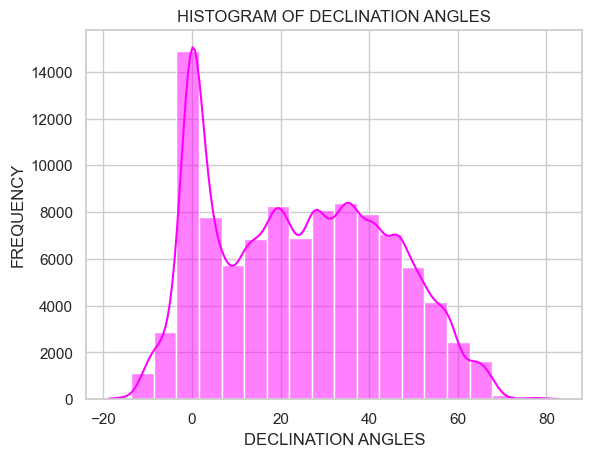

In [121]:
# Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['delta'], bins=20, color='fuchsia', kde=True)

# Adding labels and titles for better visualization
plt.xlabel('DECLINATION ANGLES')
plt.ylabel('FREQUENCY')
plt.title('HISTOGRAM OF DECLINATION ANGLES')

In [122]:
# Finding out skewness
df['delta'].skew()

0.17507856207486214

<Axes: >

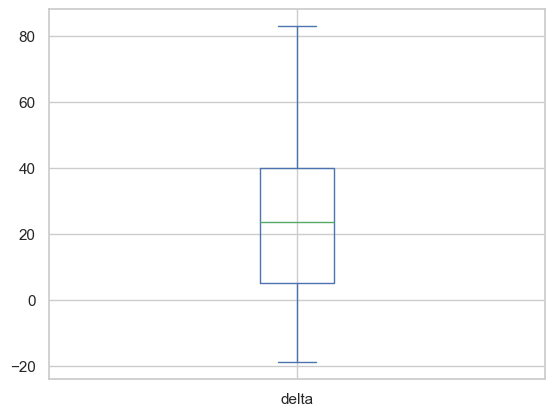

In [123]:
# Finding outliers
df['delta'].plot(kind='box')

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\3023276909.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'VIOLIN PLOT FOR DIFFERENT CATEGORIES IN DECLINATION ANGLES')

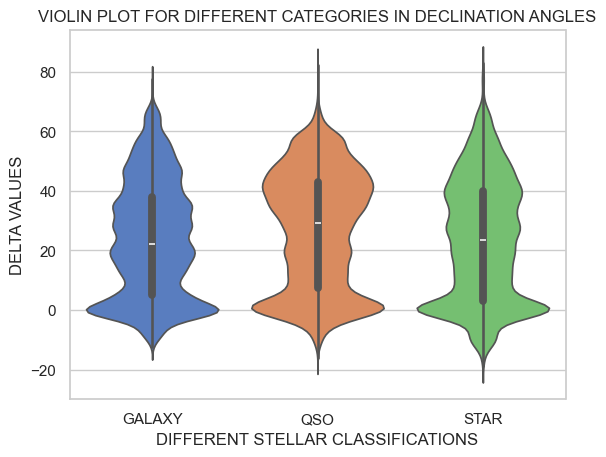

In [124]:
# Creating a violin plot
sns.violinplot(x=df['class'], y=df['delta'], palette='muted')

# Adding labels and title for better visualization
plt.xlabel('DIFFERENT STELLAR CLASSIFICATIONS')
plt.ylabel('DELTA VALUES')
plt.title('VIOLIN PLOT FOR DIFFERENT CATEGORIES IN DECLINATION ANGLES')

In [125]:
# Finding out any missing value
df['delta'].isnull().sum()

0

### **INTERPRETATION:**

Using general descriptive statistics we can see that,

- Our graph for Declination Angle is **positively skewed**.
- We have **no outliers** for Declination Angle, which was again confirmed by seeing that there are no recorded declination angles in the dataset less than -20 degrees and more than 90 degrees.

## ***REDSHIFT VALUES:***

### **GENERAL DESCRIPTIVE STATISTICS:**

In [126]:
df['redshift'].describe()

count    100000.000000
mean          0.576661
std           0.730707
min          -0.009971
25%           0.054517
50%           0.424173
75%           0.704154
max           7.011245
Name: redshift, dtype: float64

Text(0.5, 1.0, 'HISTOGRAM OF REDSHIFT VALUE')

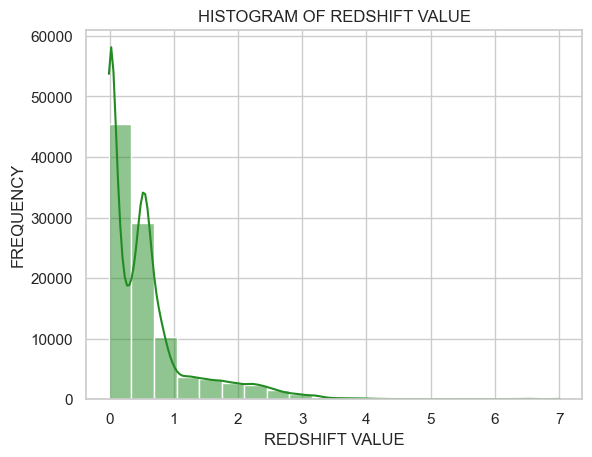

In [127]:
# Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['redshift'], bins=20, color='forestgreen', kde=True)

# Adding labels and titles for better visualization
plt.xlabel('REDSHIFT VALUE')
plt.ylabel('FREQUENCY')
plt.title('HISTOGRAM OF REDSHIFT VALUE')

In [128]:
# Finding out skewness
df['redshift'].skew()

2.523606331025997

<Axes: >

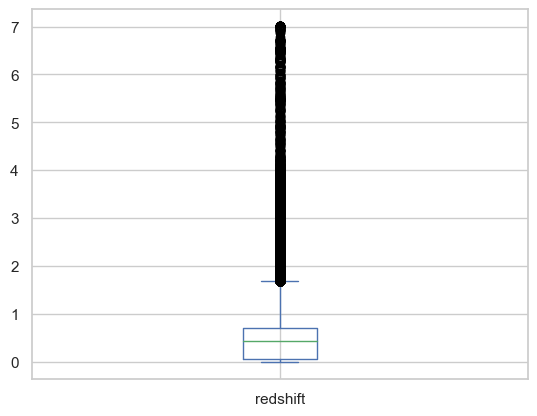

In [129]:
# Finding outliers
df['redshift'].plot(kind='box')

In [130]:
# Analysing the outliers
df[df['redshift'] > 1.85] # We can see that outlier values are having redshift values more than the maximum value of 1.85, so we try to analyse whether those are actual outliers or valid data

obj_ID       alpha      delta         u         g         r  \
17     1.237680e+18    1.494389   3.291746  20.38562  20.40514  20.29996   
23     1.237660e+18  145.883005  47.300484  21.73992  21.53095  21.26763   
47     1.237670e+18  228.447728  12.745032  22.36261  21.71060  21.59630   
71     1.237660e+18  178.504616  54.379157  21.77434  21.65529  21.77547   
83     1.237660e+18  187.973425  42.288816  23.33354  22.08951  21.85797   
...             ...         ...        ...       ...       ...       ...   
99874  1.237660e+18  219.436441   6.195903  22.31714  21.66078  21.55516   
99900  1.237680e+18  352.879980  27.433579  19.77479  19.29704  19.18981   
99926  1.237660e+18  148.560394  50.223285  22.08232  21.43803  21.41271   
99949  1.237680e+18   34.602921  31.514091  22.45167  21.19384  20.60153   
99980  1.237660e+18  225.566376  32.118746  20.53765  19.93229  19.77495   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
17     20.05918  19.89044    7712       301        5       339  9.843820e+18   
23     21.36257  21.15861    2821       301        2        33  8.228240e+18   
47     21.60179  21.12727    5322       301        3       125  6.179030e+18   
71     21.72382  21.66425    2821       301        2       177  9.264090e+18   
83     22.16238  22.55171    3893       301        3       190  9.439790e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99874  21.64294  21.38165    3910       301        3        61  5.470820e+18   
99900  19.16206  19.01953    8103       301        5        54  7.094480e+18   
99926  21.32197  20.83465    2831       301        1        62  8.210330e+18   
99949  20.56568  20.14365    7781       301        4       148  8.712480e+18   
99980  19.72304  19.40202    3900       301        3       598  4.357250e+18   

      class  redshift  plate    MJD  fiber_ID  
17      QSO  2.031528   8743  57663       295  
23      QSO  2.075680   7308  56709       596  
47      QSO  2.689002   5488  56013       320  
71      QSO  1.939080   8228  57423       667  
83      QSO  2.188856   8384  57513       886  
...     ...       ...    ...    ...       ...  
99874   QSO  2.807130   4859  55684       280  
99900   QSO  2.551272   6301  56543       682  
99926   QSO  2.291461   7292  56709       980  
99949   QSO  2.418509   7738  58100       985  
99980   QSO  2.488738   3870  55273        62  

[7489 rows x 18 columns]

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\4273112364.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'VIOLIN PLOT FOR DIFFERENT CATEGORIES IN REDSHIFT VALUES')

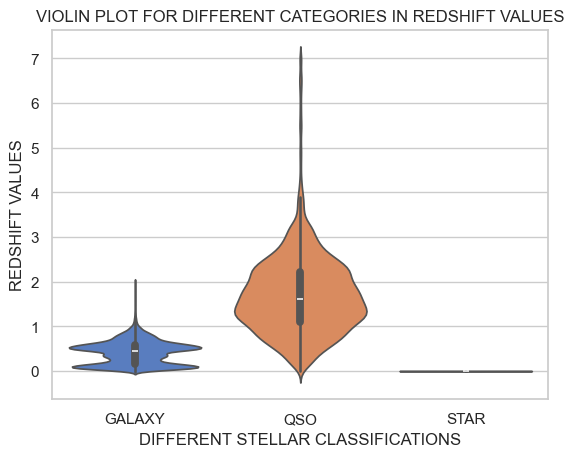

In [131]:
# Creating a violin plot
sns.violinplot(x=df['class'], y=df['redshift'], palette='muted')

# Adding labels and title for better visualization
plt.xlabel('DIFFERENT STELLAR CLASSIFICATIONS')
plt.ylabel('REDSHIFT VALUES')
plt.title('VIOLIN PLOT FOR DIFFERENT CATEGORIES IN REDSHIFT VALUES')

In [132]:
# Finding out any missing value
df['redshift'].isnull().sum()

0

### **INTERPRETATION:**

Using general descriptive statistics we can see that,

- Our graph for Redshift Value is **positively skewed**.
- We have **multiple outliers** for Redshift Values, which was again confirmed by seeing that there are 1809 recorded redshift values in the dataset more than 1.85, the maximum value.

# **EXPLORATORY VISUALIZATION:**

## ***BASIC PAIRPLOT:***

In [133]:
# sns.pairplot(df)
# plt.title("Pairplot of Variables")
# plt.show()

## ***BASIC HISTOGRAMS:***

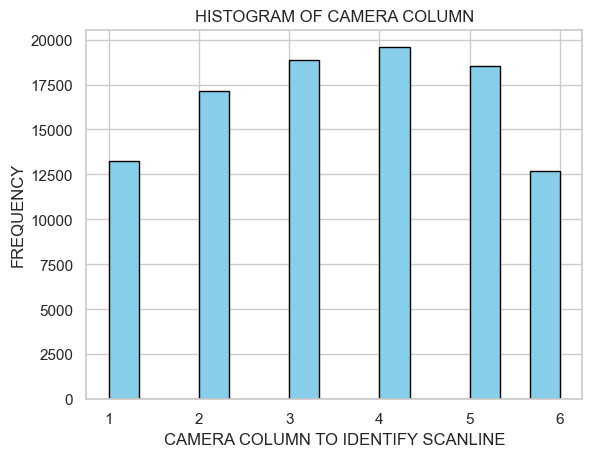

In [134]:
# Basic Histogram 1
plt.hist(df["cam_col"], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("CAMERA COLUMN TO IDENTIFY SCANLINE")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF CAMERA COLUMN")
plt.show()

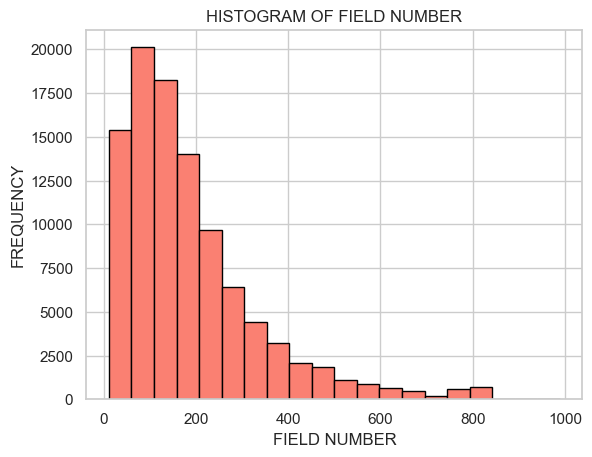

In [135]:
# Basic Histogram 2
plt.hist(df["field_ID"], bins=20, color='salmon', edgecolor='black')
plt.xlabel("FIELD NUMBER")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF FIELD NUMBER")
plt.show()

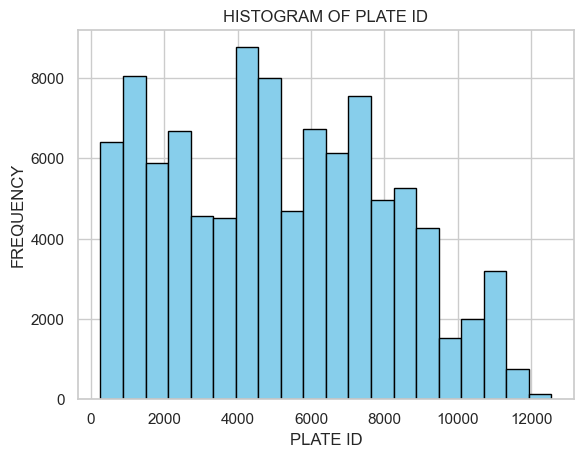

In [136]:
# Basic Histogram 3
plt.hist(df["plate"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("PLATE ID")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF PLATE ID")
plt.show()

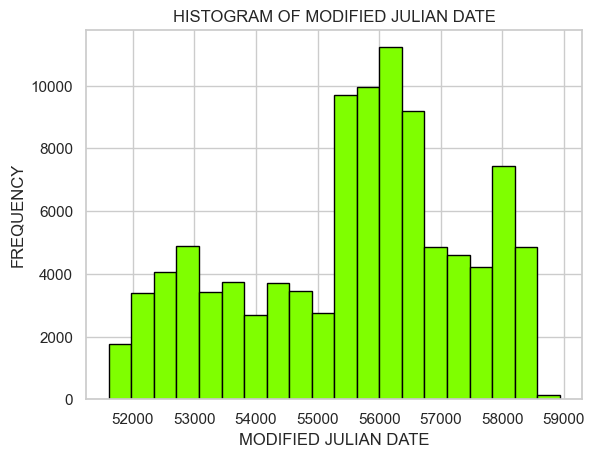

In [137]:
# Basic Histogram 4
plt.hist(df["MJD"], bins=20, color='chartreuse', edgecolor='black')
plt.xlabel("MODIFIED JULIAN DATE")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF MODIFIED JULIAN DATE")
plt.show()

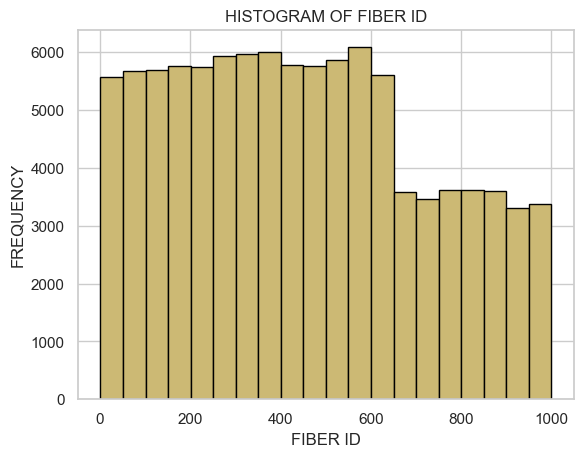

In [138]:
# Basic Histogram 5
plt.hist(df["fiber_ID"], bins=20, color='y', edgecolor='black')
plt.xlabel("FIBER ID")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF FIBER ID")
plt.show()

## ***BASIC BAR PLOT:***

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\3665771647.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




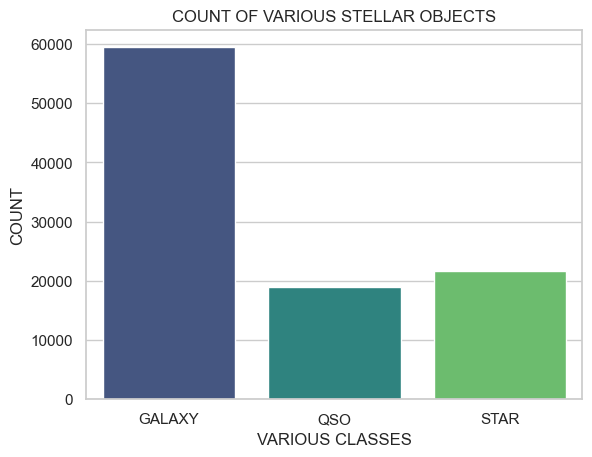

In [139]:
# Basic Bar Plot
sns.countplot(x='class', data=df, palette='viridis')
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("COUNT")
plt.title("COUNT OF VARIOUS STELLAR OBJECTS")
plt.show()

## ***BASIC BOX PLOTS:***

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\769319637.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




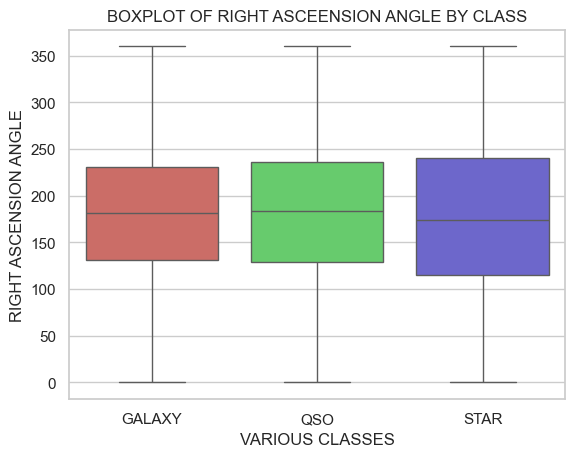

In [140]:
# Basic Box Plot 1
sns.boxplot(x='class', y='alpha', data=df, palette='hls')
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("RIGHT ASCENSION ANGLE")
plt.title("BOXPLOT OF RIGHT ASCEENSION ANGLE BY CLASS")
plt.show()

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\1381467662.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




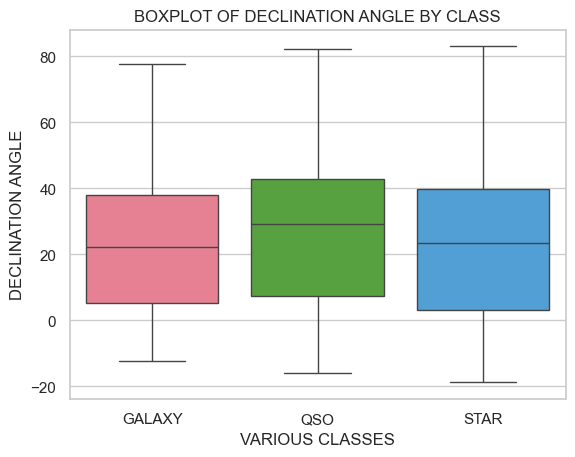

In [141]:
# Basic Box Plot 2
sns.boxplot(x='class', y='delta', data=df, palette='husl')
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("DECLINATION ANGLE")
plt.title("BOXPLOT OF DECLINATION ANGLE BY CLASS")
plt.show()

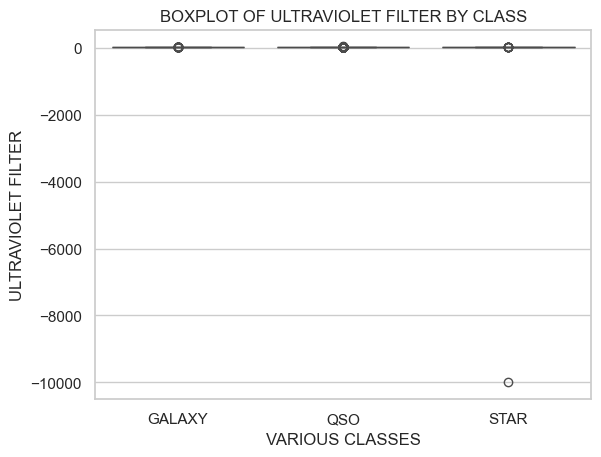

In [142]:
# Basic Box Plot 3
sns.boxplot(x='class', y='u', data=df)
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("ULTRAVIOLET FILTER")
plt.title("BOXPLOT OF ULTRAVIOLET FILTER BY CLASS")
plt.show()

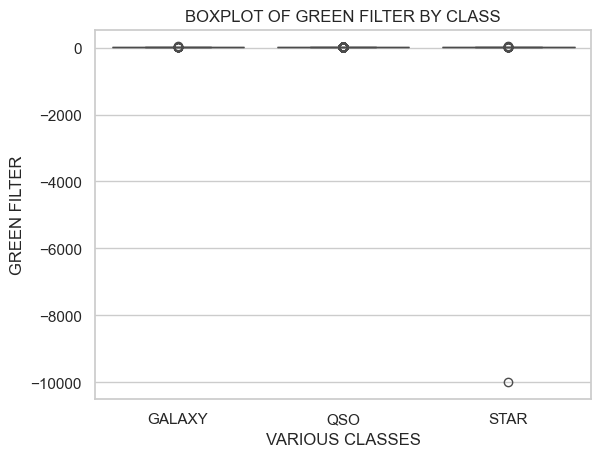

In [143]:
# Basic Box Plot 4
sns.boxplot(x='class', y='g', data=df)
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("GREEN FILTER")
plt.title("BOXPLOT OF GREEN FILTER BY CLASS")
plt.show()

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\3675004700.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




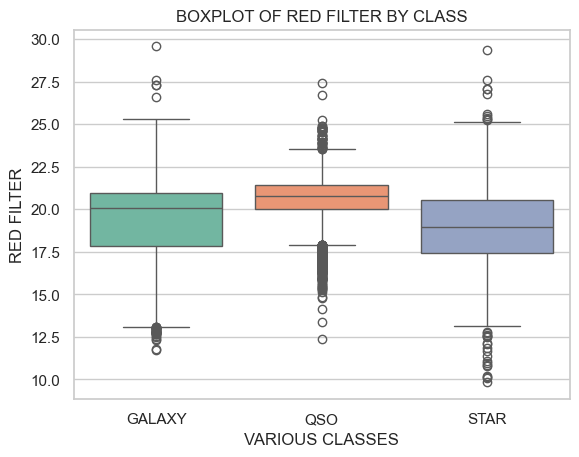

In [144]:
# Basic Box Plot 5
sns.boxplot(x='class', y='r', data=df, palette='Set2')
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("RED FILTER")
plt.title("BOXPLOT OF RED FILTER BY CLASS")
plt.show()

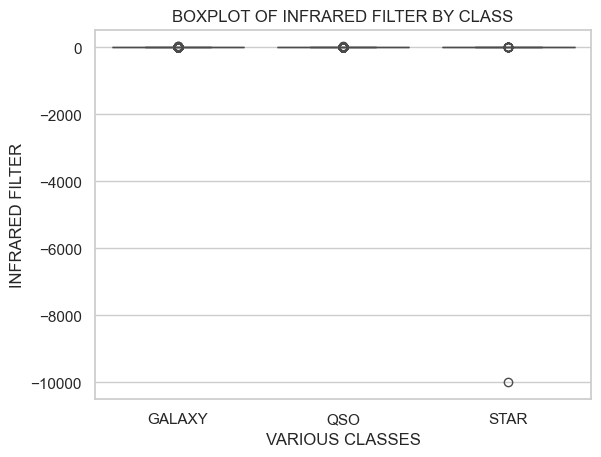

In [145]:
# Basic Box Plot 6
sns.boxplot(x='class', y='z', data=df)
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("INFRARED FILTER")
plt.title("BOXPLOT OF INFRARED FILTER BY CLASS")
plt.show()

C:\Users\DEBOLINA\AppData\Local\Temp\ipykernel_4192\3898495485.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




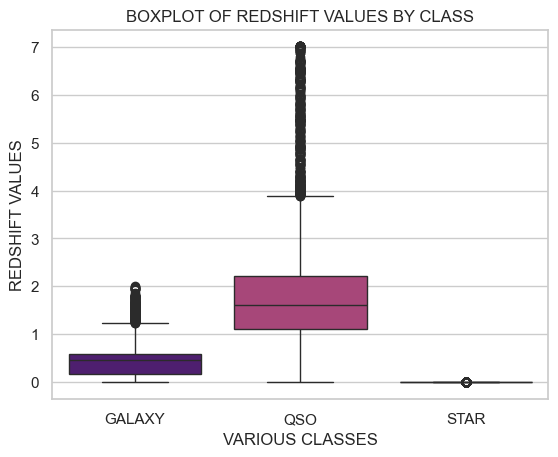

In [146]:
# Basic Box Plot 7
sns.boxplot(x='class', y='redshift', data=df, palette='magma')
plt.xlabel("VARIOUS CLASSES")
plt.ylabel("REDSHIFT VALUES")
plt.title("BOXPLOT OF REDSHIFT VALUES BY CLASS")
plt.show()

# **FEATURE ENGINEERING:**

## ***CALCULATING COLOR INDICES:***

In [147]:
df['ug'] = df['u'] - df['g']
df['gr'] = df['g'] - df['r']
df['rz'] = df['r'] - df['z']

In [148]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237660e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237660e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237660e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237660e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  ...  field_ID   spec_obj_ID   class  \
0  19.16573  18.79371    3606       301  ...        79  6.543780e+18  GALAXY   
1  21.16812  21.61427    4518       301  ...       119  1.176010e+19  GALAXY   
2  19.34857  18.94827    3606       301  ...       120  5.152200e+18  GALAXY   
3  20.50454  19.25010    4192       301  ...       214  1.030110e+19  GALAXY   
4  15.97711  15.54461    8102       301  ...       137  6.891860e+18  GALAXY   

   redshift  plate    MJD  fiber_ID       ug       gr       rz  
0  0.634794   5812  56354       171  1.60352  1.88029  1.60130  
1  0.779136  10445  58158       427  1.94571  0.24744  0.97017  
2  0.644195   4576  55592       299  2.59918  2.05413  1.66149  
3  0.932346   9149  58039       775 -1.63974  2.16494  2.36152  
4  0.116123   6121  56187       842  1.85690  1.08281  0.95286  

[5 rows x 21 columns]

### **INTERPRETATION:**

The code calculates three color indices **(ug, gr, rz)** by subtracting the values of different photometric filters (u, g, r, z). These color indices can capture information about the spectral energy distribution of objects, which may be useful for classification or regression tasks.

## ***EXTRACTING TEMPORAL FEATURES FROM MJD:***

In [149]:
# # Importing appropriate library to convert MJD values to actual dates
# from astropy.time import Time

In [150]:
# # Check for invalid values in the MJD column
# invalid_mask = ~df['MJD'].isnull() & ~np.isfinite(df['MJD'])
# invalid_values = df.loc[invalid_mask, 'MJD']
# if not invalid_values.empty:
#     print("Invalid values in MJD column:", invalid_values)

In [151]:
# # Convert MJD to actual dates
# mjd_values = df['MJD'].values
# time = Time(mjd_values, format='mjd')

# # Extract temporal features
# df['Date'] = time.datetime
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day

In [152]:
# df.head()

### **INTERPRETATION:**
In this code,
- We use the astropy.time.Time class to convert the MJD values to actual dates.
- Then, we extract the desired temporal features (year, month, day_of_week) from the converted dates using the dt accessor.
- Finally, we drop the intermediate 'date' column, as it's no longer needed after extracting the temporal features.

## ***ONE-HOT ENCODING FOR CATEGORICAL VARIABLES:***

In [153]:
df = pd.get_dummies(df, columns=['run_ID', 'rerun_ID', 'cam_col', 'field_ID'])

In [154]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237660e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237660e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237660e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237660e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z   spec_obj_ID   class  ...  field_ID_940  field_ID_941  \
0  19.16573  18.79371  6.543780e+18  GALAXY  ...         False         False   
1  21.16812  21.61427  1.176010e+19  GALAXY  ...         False         False   
2  19.34857  18.94827  5.152200e+18  GALAXY  ...         False         False   
3  20.50454  19.25010  1.030110e+19  GALAXY  ...         False         False   
4  15.97711  15.54461  6.891860e+18  GALAXY  ...         False         False   

   field_ID_971  field_ID_974  field_ID_977  field_ID_978  field_ID_979  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   field_ID_980  field_ID_982  field_ID_989  
0         False         False         False  
1         False         False         False  
2         False         False         False  
3         False         False         False  
4         False         False         False  

[5 rows x 1310 columns]

### **INTERPRETATION:**
The code performs one-hot encoding for categorical variables (run_ID, rereun_ID, cam_col, field_ID). One-hot encoding converts categorical variables into numerical representations, allowing machine learning algorithms to interpret them properly.

## ***BINNING RED-SHIFT VALUES:***

In [155]:
# Bin redshift values into categories
bins = [0, 0.5, 1.0, 1.5, 2.0, float('inf')]
labels = ['<0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '>2.0']
df['redshift_category'] = pd.cut(df['redshift'], bins=bins, labels=labels)

In [156]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237660e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237660e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237660e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237660e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z   spec_obj_ID   class  ...  field_ID_941  field_ID_971  \
0  19.16573  18.79371  6.543780e+18  GALAXY  ...         False         False   
1  21.16812  21.61427  1.176010e+19  GALAXY  ...         False         False   
2  19.34857  18.94827  5.152200e+18  GALAXY  ...         False         False   
3  20.50454  19.25010  1.030110e+19  GALAXY  ...         False         False   
4  15.97711  15.54461  6.891860e+18  GALAXY  ...         False         False   

   field_ID_974  field_ID_977  field_ID_978  field_ID_979  field_ID_980  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   field_ID_982  field_ID_989  redshift_category  
0         False         False            0.5-1.0  
1         False         False            0.5-1.0  
2         False         False            0.5-1.0  
3         False         False            0.5-1.0  
4         False         False               <0.5  

[5 rows x 1311 columns]

### **INTERPRETATION:**
The code bins the redshift values into categories (redshift_category) based on predefined bins. Binning is a preprocessing technique that discretizes continuous variables, allowing you to capture non-linear relationships or reduce the effect of outliers.

## ***DROPPING ORIGINAL COLUMNS:***

In [157]:
df.drop(columns=['spec_obj_ID', 'plate', 'fiber_ID', 'MJD'], inplace=True)

In [158]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237660e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237660e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237660e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237660e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z   class  redshift  ...  field_ID_941  field_ID_971  \
0  19.16573  18.79371  GALAXY  0.634794  ...         False         False   
1  21.16812  21.61427  GALAXY  0.779136  ...         False         False   
2  19.34857  18.94827  GALAXY  0.644195  ...         False         False   
3  20.50454  19.25010  GALAXY  0.932346  ...         False         False   
4  15.97711  15.54461  GALAXY  0.116123  ...         False         False   

   field_ID_974  field_ID_977  field_ID_978  field_ID_979  field_ID_980  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   field_ID_982  field_ID_989  redshift_category  
0         False         False            0.5-1.0  
1         False         False            0.5-1.0  
2         False         False            0.5-1.0  
3         False         False            0.5-1.0  
4         False         False               <0.5  

[5 rows x 1307 columns]

### **INTERPRETATION:**
Finally, we drop the original columns (spec_obj_ID, plate, fiber_ID, MJD) from the dataset, as they have been transformed or are no longer needed for further analysis.

# **ADVANCED VISUALIZATION:**

#### ***INTERACTIVE VISUALIZATION WITH PLOTLY:***

In [159]:
# Importing library
import plotly.express as px

In [160]:
# Creating an interactive scatter plot using Plotly Express
fig = px.scatter(df, x='alpha', y='delta', color='class', title='INTERACTIVE SCATTER PLOT')
fig.show()


### **INTERPRETATION:**
The interactive scatter plot visually represents the spatial distribution of astronomical objects based on their Right Ascension (alpha) and Declination (delta) angles. Each data point is color-coded according to its class label ('class'), allowing for easy identification of different types of celestial objects.

# **STATISTICAL ANALYSIS:**

## ***t TEST:***

In [161]:
t_statistic, p_value = stats.ttest_ind(df[df['class'] == 'GALAXY']['redshift'],
                                       df[df['class'] == 'STAR']['redshift'])
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 233.97374608907694
P-Value: 0.0



### **INTERPRETATION:**
The t-test results indicate a statistically significant difference in the redshift values between galaxies and stars. The large t-statistic value (233.97) suggests a substantial difference in means, while the p-value of 0.0 indicates that this difference is highly unlikely to have occurred by random chance alone. Therefore, we reject the null hypothesis and conclude that there is a significant difference in redshift values between galaxies and stars.

## ***ANOVA:***

In [162]:
anova_result = stats.f_oneway(df[df['class'] == 'GALAXY']['redshift'],
                               df[df['class'] == 'STAR']['redshift'],
                               df[df['class'] == 'QSO']['redshift'])
print("ANOVA F-Statistic:", anova_result.statistic)
print("ANOVA P-Value:", anova_result.pvalue)

ANOVA F-Statistic: 83429.41896678093
ANOVA P-Value: 0.0


### **INTERPRETATION:**
The ANOVA (Analysis of Variance) results indicate a statistically significant difference in redshift values among the different classes of celestial objects (galaxies, stars, and QSOs). The high F-statistic value (83429.42) suggests a significant difference in means among the groups. Additionally, the p-value of 0.0 indicates that this difference is highly unlikely to have occurred by random chance alone. Therefore, we reject the null hypothesis and conclude that there is a significant difference in redshift values among galaxies, stars, and QSOs.

## ***CHI-SQUARE TEST OF INDEPENDENCE:***

In [163]:
# Importing library
from scipy.stats import chi2_contingency

In [164]:
# Contingency table
contingency_table = pd.crosstab(df['class'], df['redshift_category'])

In [165]:
# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Statistic: 67172.51462012586
P-Value: 0.0


### **INTERPRETATION:**
The chi-square test results indicate a statistically significant association between the classes of celestial objects and the redshift categories. The high chi-square statistic value (67172.51) suggests a strong association between the two variables. Additionally, the p-value of 0.0 indicates that this association is highly unlikely to have occurred by random chance alone. Therefore, we reject the null hypothesis and conclude that there is a significant association between the classes of celestial objects and the redshift categories.

## ***LINEAR REGRESSION:***

In [166]:
# Importing library
from sklearn.linear_model import LinearRegression

In [167]:
# Defining independent and dependent variables
X = df[['u', 'g', 'r', 'z']]  # Independent variables
y = df['redshift']  # Dependent variable

In [168]:
# Fitting linear regression model
model = LinearRegression().fit(X, y)

# Printing coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.03736872 -0.11303478  0.18788879  0.15047467]
Intercept: -2.7815980355965153



### **INTERPRETATION:**
The coefficients represent how much the redshift changes for a one-unit increase in each independent variable, while the intercept is the predicted redshift when all independent variables are zero.

#### Coefficients:

'u': Decrease of ~0.0374 units in redshift per unit increase.
'g': Decrease of ~0.1130 units in redshift per unit increase.
'r': Increase of ~0.1879 units in redshift per unit increase.
'z': Increase of ~0.1505 units in redshift per unit increase.
#### Intercept:

Predicted redshift is approximately -2.7816 when all independent variables are zero.






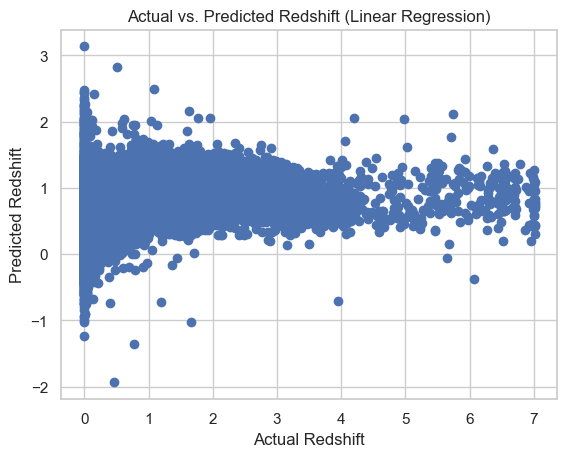

In [169]:
# Predicted values
y_pred = model.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Actual vs. Predicted Redshift (Linear Regression)')
plt.show()

## ***LOGISTIC REGRESSION:***

In [170]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [171]:
# Define independent and dependent variables
X = df[['u', 'g', 'r', 'z']]  # Independent variables
y = df['class']  # Dependent variable

In [172]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Fitting logistic regression model
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Predicting class labels
y_pred = model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.80      0.89      0.84     11860
         QSO       0.65      0.79      0.71      3797
        STAR       0.67      0.34      0.45      4343

    accuracy                           0.75     20000
   macro avg       0.71      0.67      0.67     20000
weighted avg       0.74      0.75      0.73     20000




### **INTERPRETATION:**
The classification report evaluates a logistic regression model's performance on predicting GALAXY, QSO, and STAR classes. GALAXY and QSO classes show relatively high precision and recall, while STAR class exhibits lower performance. The model achieves an overall accuracy of 75%, with notable class-specific variations.

### **GENERATING CONFUSION MATRIX BY LOGISTIC REGRESSION:**

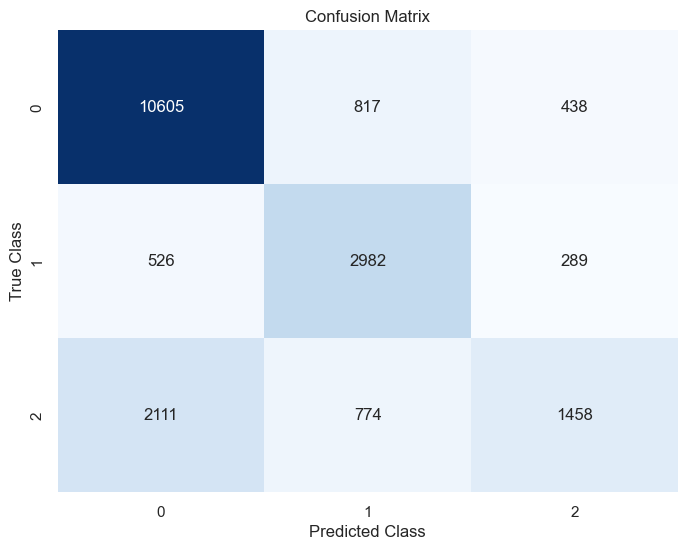

In [174]:
# Visualising using a confusion matrix
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


### **INTERPRETATION:**
The confusion matrix visually represents the performance of a classification model. It illustrates the count of true positive, true negative, false positive, and false negative predictions. Annotated values help in assessing classification accuracy for each class, aiding in model evaluation and understanding misclassifications.

## ***PRINCIPAL COMPONENT ANALYSIS (PCA):***

In [175]:
# Importing library
from sklearn.decomposition import PCA


In [176]:
# Defining independent variables
X = df[['u', 'g', 'r', 'z']]  # Independent variables

In [177]:
# Performing PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [178]:
# Transforming data
X_pca = pca.transform(X)

In [179]:
# Printing explained variance ratio:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.99810488 0.00115045]


### **INTERPRETATION:**
The PCA analysis reveals that the first principal component explains approximately 99.81% of the variance in the data, while the second component explains around 0.12%. This suggests that the majority of the dataset's variability is captured by the first principal component, indicating potential redundancy in the features.

# ***MACHINE LEARNING ALGORITHMS:***

In [180]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable
X = df.drop(columns=['obj_ID', 'class', 'redshift_category'])
y = df['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ***DECISION TREE:***


In [181]:
from sklearn.tree import DecisionTreeClassifier

# Building the decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Making predictions
dt_predictions = dt_classifier.predict(X_test_scaled)

# Evaluating the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_predictions))
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))


Decision Tree Classifier Accuracy: 0.96825

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.92      0.92      0.92      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[11552   287    21]
 [  310  3486     1]
 [   16     0  4327]]


### **INTERPRETATION:**
The Decision Tree Classifier achieved an accuracy of approximately 97%. The classification report indicates high precision, recall, and F1-score for all classes (GALAXY, QSO, and STAR), suggesting robust performance. The confusion matrix shows that most predictions align with the true classes, with few misclassifications. Overall, the model demonstrates strong classification capabilities.

## ***K-NEAREST NEIGHBOURS (KNN):***

In [182]:
from sklearn.neighbors import KNeighborsClassifier

# Building the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Making predictions
knn_predictions = knn_classifier.predict(X_test_scaled)

# Evaluating the model
print("KNN Classifier Accuracy:", accuracy_score(y_test, knn_predictions))
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))


KNN Classifier Accuracy: 0.6474

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.69      0.86      0.76     11860
         QSO       0.52      0.35      0.42      3797
        STAR       0.55      0.34      0.42      4343

    accuracy                           0.65     20000
   macro avg       0.59      0.51      0.53     20000
weighted avg       0.63      0.65      0.62     20000


Confusion Matrix:
[[10161   831   868]
 [ 2156  1329   312]
 [ 2474   411  1458]]


### **INTERPRETATION:**
The K-Nearest Neighbors (KNN) Classifier achieved an accuracy of approximately 65%. However, its performance varies across classes. While it shows good precision and recall for GALAXY class, it struggles with QSO and STAR classes, indicating difficulty in correctly identifying these classes. The confusion matrix highlights misclassifications, particularly for QSO and STAR classes.

## ***RANDOM FOREST:***

In [183]:
from sklearn.ensemble import RandomForestClassifier

# Building the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions
rf_predictions = rf_classifier.predict(X_test_scaled)

# Evaluating the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Classifier Accuracy: 0.9698

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     11860
         QSO       0.96      0.91      0.93      3797
        STAR       0.98      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[11614   158    88]
 [  353  3442     2]
 [    3     0  4340]]


### **INTERPRETATION:**
The Random Forest Classifier achieved an impressive accuracy of approximately 97%. It demonstrates high precision, recall, and F1-score across all classes, indicating robust performance. The confusion matrix illustrates minimal misclassifications, emphasizing the model's effectiveness in correctly predicting GALAXY, QSO, and STAR classes.

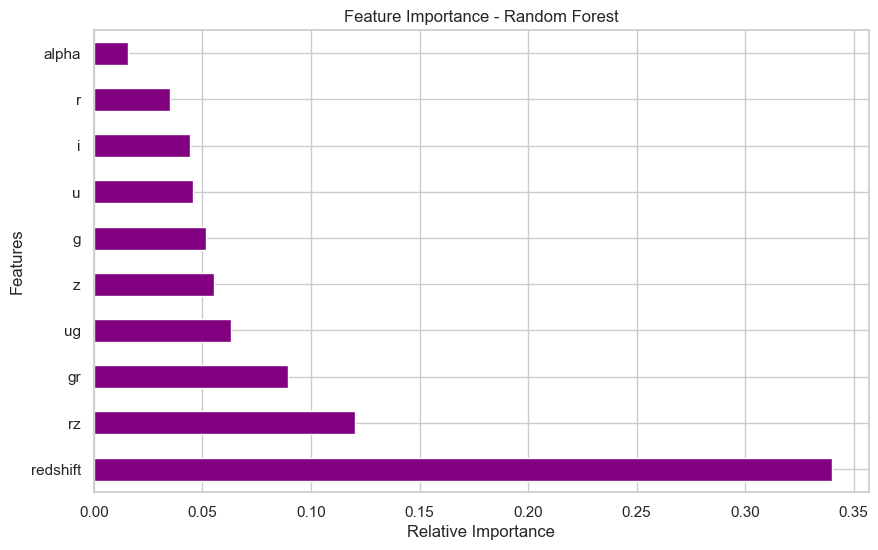

In [184]:
# Plotting feature importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='purple')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


### **INTERPRETATION:**
The bar plot displays the relative importance of features in the Random Forest model. Features with higher importance contribute more to the model's predictive performance. In this case, 'r' and 'g' bands appear to be the most influential features for predicting redshift, followed by 'z' and 'u' bands.

## ***XGBOOST:***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable (y)
y_encoded = label_encoder.fit_transform(y_train)

# Build and train the XGBoost model
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_encoded)

# Making predictions
xgb_predictions = xgb_classifier.predict(X_test_scaled)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(xgb_predictions)

# Evaluating the model
print("Extreme Gradient Boosting (XGBoost) Classifier:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision: ", precision_score(y_test, y_pred, average='weighted') * 100, "%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Extreme Gradient Boosting (XGBoost) Classifier:
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11860
         QSO       0.96      0.93      0.94      3797
        STAR       0.99      1.00      0.99      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Accuracy:  97.56 %
Precision:  97.5486055858613 %

Confusion Matrix:
[[11669   141    50]
 [  276  3520     1]
 [   20     0  4323]]


### **INTERPRETATION:**
The provided code block seems to be executing various machine learning classifiers on a dataset, likely for classifying astronomical objects based on their features. Each classifier's performance is evaluated using metrics like accuracy, precision, and confusion matrix. Notably, the Extreme Gradient Boosting (XGBoost) Classifier achieved the highest accuracy of 97.56%, demonstrating robust performance in classifying the objects into different categories.

## ***GAUSSIAN NAIVE BAYES:***

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Building the Gaussian Naive Bayes (NB) model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Making predictions
nb_predictions = nb_classifier.predict(X_test_scaled)

# Evaluating the model
print("Gaussian Naive Bayes (NB) Classifier:")
print("Classification Report:")
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions) * 100, "%")
print("Precision: ", precision_score(y_test, nb_predictions, average='weighted') * 100, "%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))



Gaussian Naive Bayes (NB) Classifier:
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.88      0.09      0.17     11860
         QSO       0.20      0.97      0.34      3797
        STAR       0.96      0.12      0.21      4343

    accuracy                           0.26     20000
   macro avg       0.68      0.39      0.24     20000
weighted avg       0.77      0.26      0.21     20000

Accuracy:  26.484999999999996 %
Precision:  76.66966937649497 %

Confusion Matrix:
[[ 1082 10760    18]
 [   92  3702     3]
 [   61  3769   513]]


### **INTERPRETATION:**
The Gaussian Naive Bayes classifier performed poorly on the dataset. It achieved an accuracy of only 26.48%. While it exhibited high precision for the GALAXY and STAR classes, its recall rates were generally low, especially for GALAXY and STAR. This indicates that the model struggled to correctly identify instances of GALAXY and STAR, leading to a high number of false negatives.

## ***GRADIENT BOOSTING:***

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

# Building the GBM model
gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train_scaled, y_train)

# Making predictions
gbm_predictions = gbm_classifier.predict(X_test_scaled)

# Evaluating the model
print("Gradient Boosting Machines (GBM) Classifier:")
print("Classification Report:")
print(classification_report(y_test, gbm_predictions))
print("Accuracy: ", accuracy_score(y_test, gbm_predictions) * 100, "%")
print("Precision: ", precision_score(y_test, gbm_predictions, average='weighted') * 100, "%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gbm_predictions))


Gradient Boosting Machines (GBM) Classifier:
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11860
         QSO       0.96      0.92      0.94      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Accuracy:  97.57000000000001 %
Precision:  97.55761955118906 %

Confusion Matrix:
[[11697   144    19]
 [  314  3482     1]
 [    8     0  4335]]


### **INTERPRETATION:**
The Gradient Boosting Machines (GBM) classifier achieved a high accuracy of 97.57%, indicating strong performance in classifying the astronomical objects. It demonstrated excellent precision and recall rates for all classes, with particularly high scores for GALAXY and STAR. The confusion matrix shows that the model made very few misclassifications, highlighting its effectiveness in distinguishing between different types of astronomical objects. Overall, the GBM classifier proved to be a robust and reliable model for this classification task.

## ***HIERARCHIAL CLUSTERING WITH DENDROGRAM:***

In [ ]:
# Importing library
from scipy.cluster import hierarchy

In [ ]:
# Let's assume we're using the first 100 rows of the dataset
subset_df = df.iloc[:100]

In [ ]:
# Compute hierarchical clustering
linkage_matrix = hierarchy.linkage(subset_df.drop(columns=['obj_ID', 'class', 'redshift_category']), method='ward')

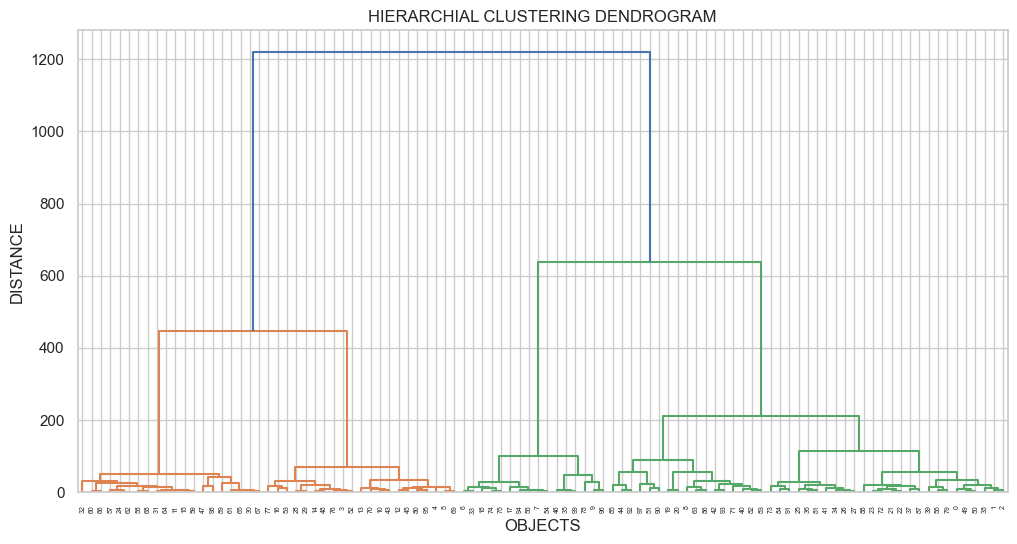

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix)
plt.title('HIERARCHIAL CLUSTERING DENDROGRAM')
plt.xlabel('OBJECTS')
plt.ylabel('DISTANCE')
plt.show()


### **INTERPRETATION:**
The hierarchical clustering dendrogram provides insights into the relationships between the first 100 rows of the dataset based on their features. Each leaf node in the dendrogram represents an individual object, while the branches represent the clusters formed during the hierarchical clustering process. The height of each branch indicates the distance or dissimilarity between clusters or individual objects.

Interpreting the dendrogram involves identifying clusters of objects that are grouped together based on their similarities. Objects that are closer together in the dendrogram are more similar to each other in terms of their feature values. Conversely, objects that are farther apart are less similar.

By analyzing the dendrogram, we can observe how the objects are grouped into clusters and how these clusters are further merged as the distance increases. This can provide insights into the underlying structure of the data and potentially identify natural groupings or patterns within the dataset.